# Transformation des features quantitatifs en machine learning

Dans les modèles de machine learning, on peut souvent être amené à transformer les variables pour avoir des distributions normales.
Dans ce notebook, nous allons explorer trois techniques différentes de transformation des features:

    - La Transformartion puissance de Box-Cox
    
    - La transformation de Yeo-Johnson
    
    - Les transformations logarithmiques
    
    - Les transformations puissances

# Importation des packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson

# La transformation de Box-Cox


La puissance de Box-Cox est une technique qui est utile lorsque les données ont une distribution non normale. Box-Cox **utilise une transformation de puissance pour créer une distribution plus normale en ajustant la valeur de lambda**.

La formule de la transformation de Box-Cox est la suivante :

$$
y(\lambda) =
\begin{cases}
\frac{y^\lambda - 1}{\lambda} & \text{si } \lambda \neq 0 \\
\log(y) & \text{si } \lambda = 0
\end{cases}
$$



où y est la variable à transformer et lambda est la valeur qui maximise la vraisemblance.

## Avantages de la transformation de Box-Cox

- Crée une distribution plus normale des données
- La valeur optimale de lambda est choisie automatiquement pour maximiser la vraisemblance.

## Inconvénients de la transformation de Box-Cox

- **Ne peut être appliquée qu'aux données positives.**
- Si lambda est proche de zéro, la transformation est similaire à une transformation logarithmique, ce qui peut avoir des effets indésirables sur les données.
- Si lambda est très grand, la transformation peut être instable.


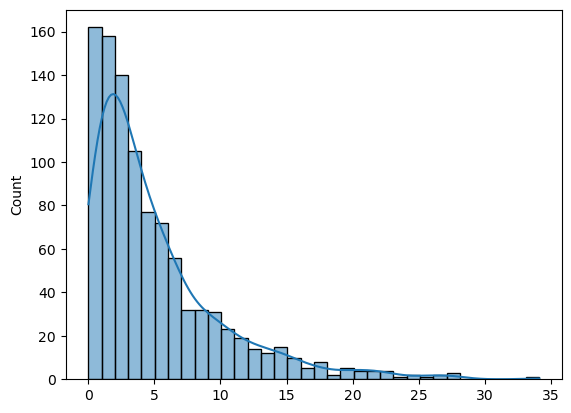

In [4]:

# Créer des données simulées avec une distribution asymétrique
np.random.seed(123)
x = np.random.exponential(5, 1000)

# Afficher un histogramme des données d'origine
sns.histplot(x, kde=True)
plt.show()


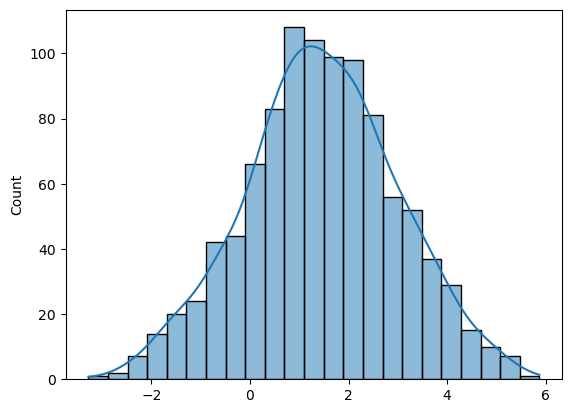

In [5]:

# Appliquer la transformation de Box-Cox à la variable x
x_boxcox, lambda_boxcox = boxcox(x)

# Afficher un histogramme de la variable transformée
sns.histplot(x_boxcox, kde=True)
plt.show()

# La transformation de Yeo-Johnson

## La transformation de Yeo-Johnson

La transformation de Yeo-Johnson est une technique similaire à la transformation de Box-Cox, mais elle **peut être utilisée pour des distributions non normales et avec des valeurs négatives**. Yeo-Johnson **applique une transformation qui est une combinaison de la transformation de puissance et de la transformation logarithmique**. Comme pour Box-Cox, l'algorithme choisit automatiquement la transformation optimale pour maximiser la vraisemblance.

La formule de la transformation de Yeo-Johnson est la suivante :

$$
y(\lambda) =
\begin{cases}
\frac{(y+1)^\lambda - 1}{\lambda} & \text{si } y \geq 0, \lambda \neq 0 \\
\log(y+1) & \text{si } y \geq 0, \lambda = 0 \\
-\frac{(-y+1)^{2-\lambda}-1}{2-\lambda} & \text{si } y < 0, \lambda \neq 2 \\
-\log(-y+1) & \text{si } y < 0, \lambda = 2
\end{cases}
$$

où y est la variable à transformer et lambda est la valeur qui maximise la vraisemblance.

### Avantages de la transformation de Yeo-Johnson

- Peut être utilisée pour des distributions non normales et avec des valeurs négatives.
- Comme pour Box-Cox, la valeur optimale de lambda est choisie automatiquement pour maximiser la vraisemblance.

### Inconvénients de la transformation de Yeo-Johnson

- Peut être plus lente à calculer que la transformation de Box-Cox.
- La transformation peut être instable pour certaines valeurs de lambda.


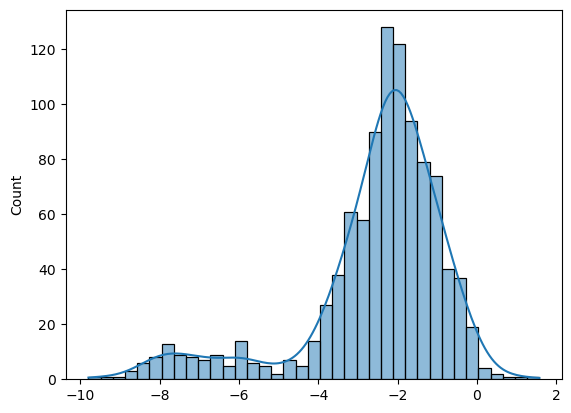

In [18]:
# Créer des données simulées avec une distribution asymétrique et des valeurs négatives
np.random.seed(123)
x = np.random.normal(-2, 1, 1000)
x[:100] = x[:100] - 5

# Afficher un histogramme des données d'origine
sns.histplot(x, kde=True)
plt.show()


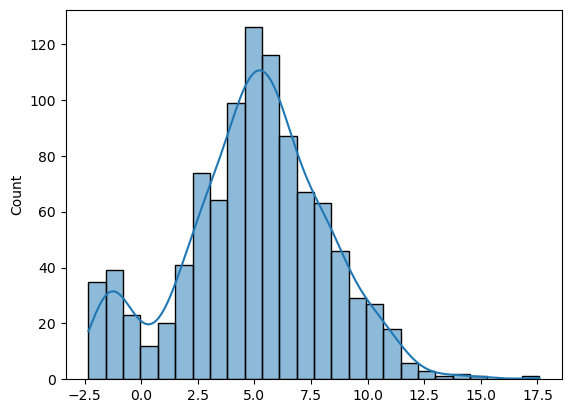

In [19]:
# Appliquer la transformation de Yeo-Johnson à la variable x
x_yeojohnson, lambda_yeojohnson = yeojohnson(x + 5)

# Afficher un histogramme de la variable transformée
sns.histplot(x_yeojohnson, kde=True)
plt.show()

# Transformation logarithmique


Les logarithmes sont une technique courante pour transformer des variables qui ont des distributions très asymétriques. La transformation logarithmique est particulièrement utile pour les variables qui ont des valeurs très grandes ou très petites.

La formule de la transformation logarithmique est la suivante :

$$
y' = \log(y)
$$

où y est la variable à transformer.

## Avantages de la transformation logarithmique

- Utile pour les variables qui ont des valeurs très grandes ou très petites.
- Facile à calculer.

## Inconvénients de la transformation logarithmique

- Ne peut être appliquée qu'aux données positives.
- Si les données ont des valeurs nulles ou négatives, une transformation différente doit être utilisée.
- La transformation peut être affectée par les valeurs extrêmes (outliers) dans les données.

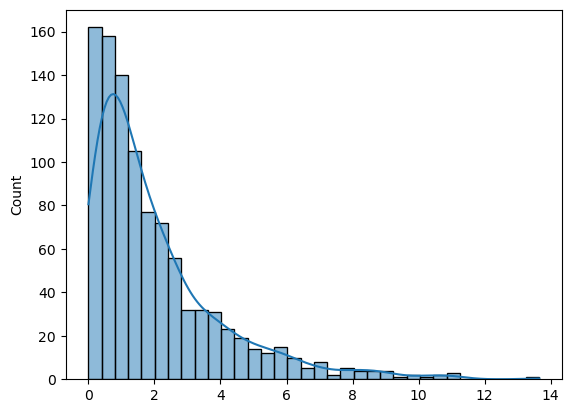

In [20]:
# Créer des données simulées avec une distribution exponentielle
np.random.seed(123)
x = np.random.exponential(2, 1000)

# Afficher un histogramme des données d'origine
sns.histplot(x, kde=True)
plt.show()


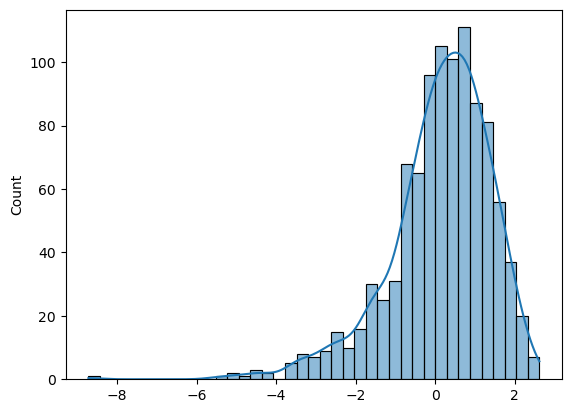

In [21]:
# Appliquer la transformation logarithmique à la variable x
x_log = np.log(x)

# Afficher un histogramme de la variable transformée
sns.histplot(x_log, kde=True)
plt.show()

# Transformation puissance

Les transformations puissances sont une technique qui permet d'appliquer une transformation de puissance à une variable. 

La formule de la transformation de puissance est la suivante :

$$
y' = y^\lambda
$$

où y est la variable à transformer et $\lambda$ est la valeur de la puissance. Il est important de noter que la valeur de $\lambda$ peut être positive, négative ou même fractionnaire.

## Avantages des transformations puissances

- Peuvent être utilisées pour créer une distribution plus normale des données lorsque la transformation logarithmique ne fonctionne pas.
- Peuvent être utilisées pour ajuster la distribution des données à un modèle spécifique.

## Inconvénients des transformations puissances

- La valeur de $\lambda$ doit être choisie manuellement, ce qui peut être difficile et peut affecter les performances du modèle si elle est mal choisie.
- Les transformations puissances ne fonctionnent pas pour toutes les distributions de données, et peuvent même aggraver les asymétries de certaines distributions.


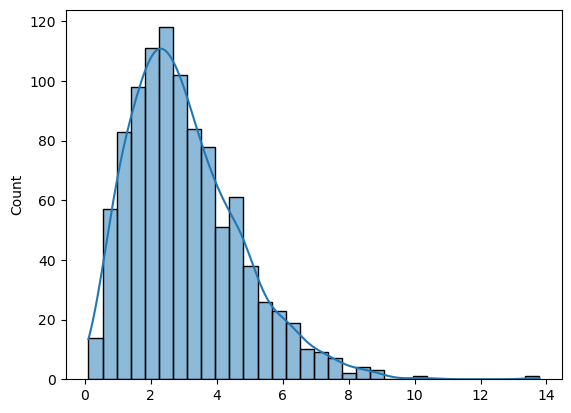

In [22]:
# Créer des données simulées avec une distribution asymétrique
np.random.seed(123)
x = np.random.gamma(3, 1, 1000)

# Afficher un histogramme des données d'origine
sns.histplot(x, kde=True)
plt.show()

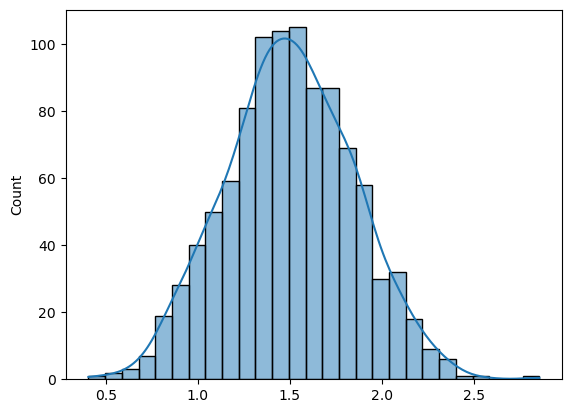

In [23]:
# Appliquer la transformation de puissance à la variable x
x_power = np.power(x, 0.4)

# Afficher un histogramme de la variable transformée
sns.histplot(x_power, kde=True)
plt.show()